In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\data\demo_data\7.xor.csv",header=None)

In [4]:
data.shape

(500, 3)

In [5]:
data.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

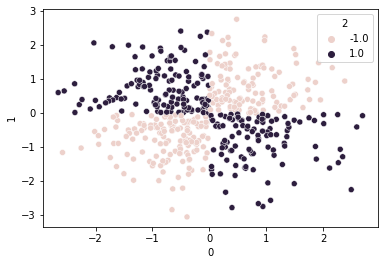

In [6]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [7]:
data[2].value_counts()

-1.0    260
 1.0    240
Name: 2, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1)

In [10]:
x_train.shape

(450, 2)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
std=StandardScaler()

In [13]:
stdd=std.fit_transform(x_train)

In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import tensorflow

In [15]:
import tensorflow.keras 

In [16]:
from tensorflow.keras import Sequential

In [17]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

model=Sequential()
model.add(Dense(10000,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(10000,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

model=Sequential()
model.add(Dense(20,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(25,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(19,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [30]:
model=Sequential()
model.add(Dense(400,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(400,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(400,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(400,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 400)               1200      
                                                                 
 batch_normalization_4 (Batc  (None, 400)              1600      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 400)               160400    
                                                                 
 batch_normalization_5 (Batc  (None, 400)              1600      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 400)              

In [32]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [33]:
save=model.fit(x_train,y_train,batch_size=10,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
36/36 [==============================] - 3s 16ms/step - loss: -3.6126 - accuracy: 0.4111 - val_loss: -7.5542 - val_accuracy: 0.3778
Epoch 2/10
36/36 [==============================] - 0s 8ms/step - loss: -9.1958 - accuracy: 0.4222 - val_loss: -21.4086 - val_accuracy: 0.3889
Epoch 3/10
36/36 [==============================] - 0s 8ms/step - loss: -16.6484 - accuracy: 0.4389 - val_loss: -31.1044 - val_accuracy: 0.3778
Epoch 4/10
36/36 [==============================] - 0s 8ms/step - loss: -23.0401 - accuracy: 0.4306 - val_loss: -53.1061 - val_accuracy: 0.4000
Epoch 5/10
36/36 [==============================] - 0s 8ms/step - loss: -31.3426 - accuracy: 0.4111 - val_loss: -72.0808 - val_accuracy: 0.4000
Epoch 6/10
36/36 [==============================] - 0s 8ms/step - loss: -41.8467 - accuracy: 0.4278 - val_loss: -89.6763 - val_accuracy: 0.4333
Epoch 7/10
36/36 [==============================] - 0s 8ms/step - loss: -56.2939 - accuracy: 0.4389 - val_loss: -109.2007 - val_accuracy: 

In [34]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

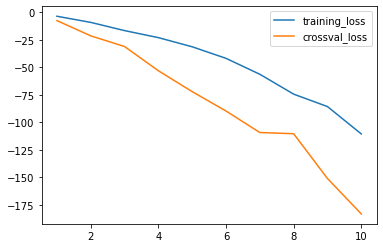

In [35]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),tl,label="training_loss")
plt.plot(range(1,11),cvl,label="crossval_loss")
plt.legend()

In [36]:
predi=model.predict(x_train)

15/15 [==============================] - 0s 3ms/step


In [37]:
import numpy as np

In [38]:
preict=np.where(predi>0.5,1,0).flatten()

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_train,preict)


0.48444444444444446

In [41]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 10s 3ms/step


<AxesSubplot:>

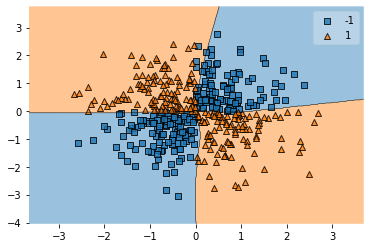

In [42]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)